In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.cm as cm
import seaborn as sns
import geopandas as gpd
from ipywidgets import interact
import datetime as dt
sns.set(style="ticks")


pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
sns.set(style="ticks")
%matplotlib inline


import seaborn as sns
pd.set_option('display.width', 1500)
pd.set_option('display.max_columns', 100)

sns.set_context('poster') 

In [2]:
nyc_cab=pd.read_csv('https://s3.amazonaws.com/nyc-tlc/trip+data/green_tripdata_2015-09.csv')

In [3]:
nyc_cab.head()

,VendorID,lpep_pickup_datetime,Lpep_dropoff_datetime,Store_and_fwd_flag,RateCodeID,Pickup_longitude,Pickup_latitude,Dropoff_longitude,Dropoff_latitude,Passenger_count,Trip_distance,Fare_amount,Extra,MTA_tax,Tip_amount,Tolls_amount,Ehail_fee,improvement_surcharge,Total_amount,Payment_type,Trip_type
0,2,2015-09-01 00:02:34,2015-09-01 00:02:38,N,5,-73.979485,40.684956,-73.979431,40.685020,1,0.00,7.8,0.0,0.0,1.95,0.0,NaN,0.0,9.75,1,2.0
1,2,2015-09-01 00:04:20,2015-09-01 00:04:24,N,5,-74.010796,40.912216,-74.010780,40.912212,1,0.00,45.0,0.0,0.0,0.00,0.0,NaN,0.0,45.00,1,2.0
2,2,2015-09-01 00:01:50,2015-09-01 00:04:24,N,1,-73.921410,40.766708,-73.914413,40.764687,1,0.59,4.0,0.5,0.5,0.50,0.0,NaN,0.3,5.80,1,1.0
3,2,2015-09-01 00:02:36,2015-09-01 00:06:42,N,1,-73.921387,40.766678,-73.931427,40.771584,1,0.74,5.0,0.5,0.5,0.00,0.0,NaN,0.3,6.30,2,1.0
4,2,2015-09-01 00:00:14,2015-09-01 00:04:20,N,1,-73.955482,40.714046,-73.944412,40.714729,1,0.61,5.0,0.5,0.5,0.00,0.0,NaN,0.3,6.30,2,1.0


In [4]:
n_rows=nyc_cab.shape[0]
n_columns=nyc_cab.shape[1]
print('number of rows =',n_rows)
print('number of columns =',n_columns)

number of rows = 1494926
number of columns = 21


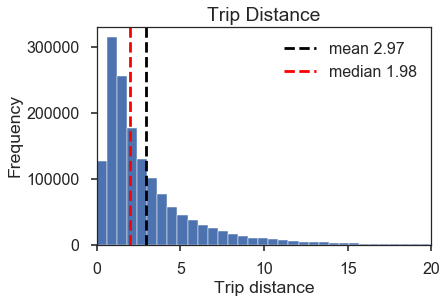

In [5]:
plt.hist(nyc_cab['Trip_distance'],bins=1000,edgecolor='white')
plt.title('Trip Distance')
plt.axvline(nyc_cab['Trip_distance'].mean(), c='black',label='mean %0.2f'%(nyc_cab['Trip_distance'].mean()),ls='--')
plt.axvline(nyc_cab['Trip_distance'].median(), c='red',label='median %0.2f'%(nyc_cab['Trip_distance'].median()),ls='--')
plt.xlabel('Trip distance')
plt.ylabel('Frequency')
plt.legend()
plt.xlim(0,20)
plt.show()


Trip Distance forms a right skewed distribution. It is evident from the histogram that there are many trip distances having a value of zero. One possible explanation is that passenger get on the taxi and get off immediately (if the taxi is stuck in traffic for a long time at the same location).

For data points having trip distance as zero, the pickup and dropoff latitude and longitude are different. This is an anamoly in the data.

Text(0,0.5,'Fare Amount')

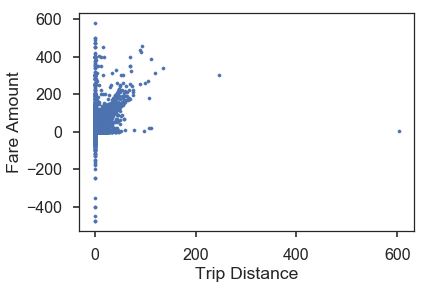

In [6]:
plt.scatter(nyc_cab['Trip_distance'],nyc_cab['Fare_amount'],s=10)
plt.xlabel('Trip Distance')
plt.ylabel('Fare Amount')

This scatter plot shows some erroneous observations-

1) There are negative Fare Amounts

2)There are some outliers having unusually large trip distances

Removing these erroneous data from the scatter plot.

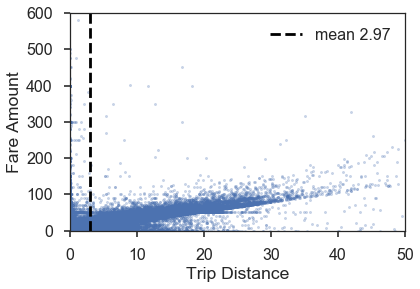

In [7]:
plt.scatter(nyc_cab['Trip_distance'],nyc_cab['Fare_amount'],s=5,alpha=0.3,label='_nolegend_')
plt.axvline(nyc_cab['Trip_distance'].mean(),color='black',
            label='mean %0.2f'%(nyc_cab['Trip_distance'].mean()),ls='--')
plt.legend()
plt.xlim(0,50)
plt.ylim(0,600)
plt.xlabel('Trip Distance')
plt.ylabel('Fare Amount')
plt.show()

This scatter plot shows a nearly linear relationship between trip distance and fare amount with some irregularities.

1)There are some trips whose distances are very less but have very high fare amount.

2)There are some trips whose distances are very high but have very low fare amount.

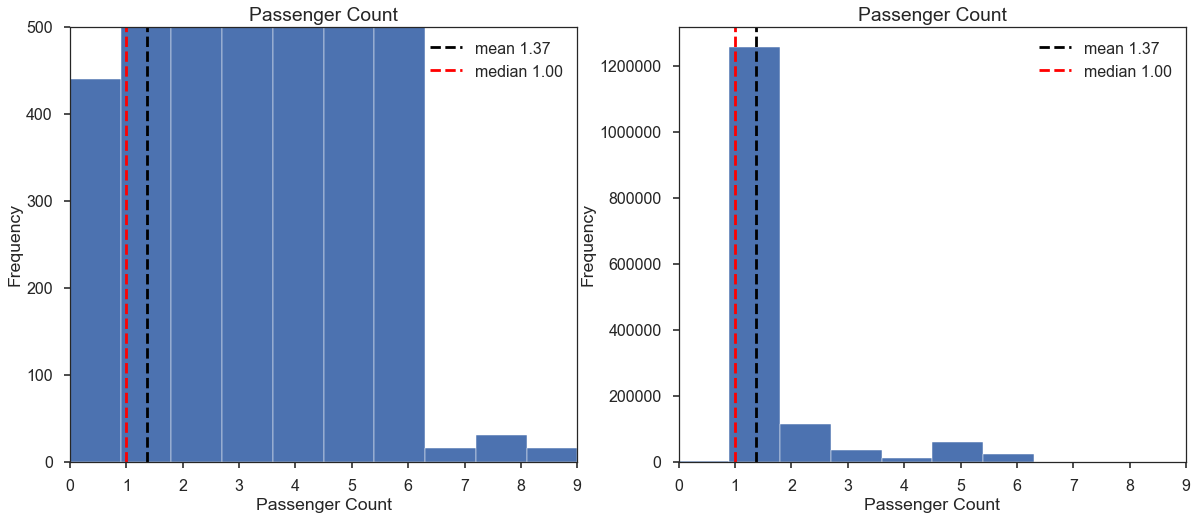

In [8]:
fig,ax=plt.subplots(1,2,figsize=(20,8),sharex='all')
ax[0].hist(nyc_cab['Passenger_count'],bins=10,edgecolor='white',label='_nolegend_')
ax[0].set_title('Passenger Count')
ax[0].axvline(nyc_cab['Passenger_count'].mean(), c='black',label='mean %0.2f'%(nyc_cab['Passenger_count'].mean()),ls='--')
ax[0].axvline(nyc_cab['Passenger_count'].median(), c='red',label='median %0.2f'%(nyc_cab['Passenger_count'].median()),ls='--')
ax[0].set_xlabel('Passenger Count')
ax[0].set_ylabel('Frequency')
ax[0].legend()
ax[0].set_xlim(0,9)
ax[0].set_xticks(np.arange(min(nyc_cab['Passenger_count']), max(nyc_cab['Passenger_count'])+1, 1.0))
ax[0].set_ylim(0,500)

ax[1].hist(nyc_cab['Passenger_count'],bins=10,edgecolor='white',label='_nolegend_')
ax[1].set_title('Passenger Count')
ax[1].axvline(nyc_cab['Passenger_count'].mean(), c='black',label='mean %0.2f'%(nyc_cab['Passenger_count'].mean()),ls='--')
ax[1].axvline(nyc_cab['Passenger_count'].median(), c='red',label='median %0.2f'%(nyc_cab['Passenger_count'].median()),ls='--')
ax[1].set_xlabel('Passenger Count')
ax[1].set_ylabel('Frequency')
ax[1].legend()
ax[1].set_xlim(0,9)
ax[1].set_xticks(np.arange(min(nyc_cab['Passenger_count']), max(nyc_cab['Passenger_count'])+1, 1.0))
plt.show()

By limiting y axis it becomes clear that there are many passenger counts in the data having a value of zero. This is an errorneous observation as zero passenger count do not make any sense.

In [9]:
nyc_cab['lpep_pickup_datetime']=pd.to_datetime(nyc_cab['lpep_pickup_datetime'])
nyc_cab['Lpep_dropoff_datetime']=pd.to_datetime(nyc_cab['Lpep_dropoff_datetime'])

In [10]:
mean_tripdistance=nyc_cab['Trip_distance'].groupby(nyc_cab['lpep_pickup_datetime'].dt.hour).mean()
median_tripdistance=nyc_cab['Trip_distance'].groupby(nyc_cab['lpep_pickup_datetime'].dt.hour).median()

In [11]:
print(mean_tripdistance)
print(median_tripdistance)

lpep_pickup_datetime
0     3.115276
1     3.017347
2     3.046176
3     3.212945
4     3.526555
5     4.133474
6     4.055149
7     3.284394
8     3.048450
9     2.999105
10    2.944482
11    2.912015
12    2.903065
13    2.878294
14    2.864304
15    2.857040
16    2.779852
17    2.679114
18    2.653222
19    2.715597
20    2.777052
21    2.999189
22    3.185394
23    3.191538
Name: Trip_distance, dtype: float64
lpep_pickup_datetime
0     2.20
1     2.12
2     2.14
3     2.20
4     2.36
5     2.90
6     2.84
7     2.17
8     1.98
9     1.96
10    1.92
11    1.88
12    1.89
13    1.84
14    1.83
15    1.81
16    1.80
17    1.78
18    1.80
19    1.85
20    1.90
21    2.03
22    2.20
23    2.22
Name: Trip_distance, dtype: float64


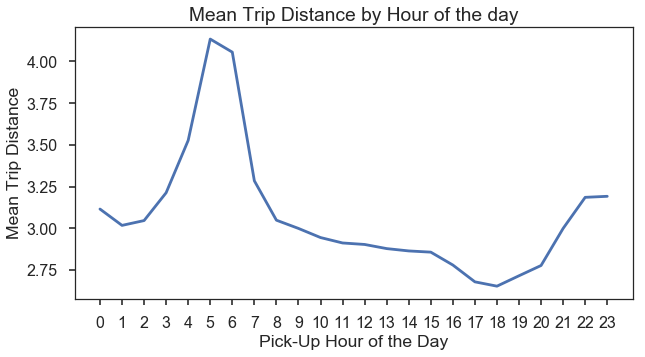

In [12]:
fig,ax=plt.subplots(1,1,figsize=(10,5))
ax.plot(mean_tripdistance.index,mean_tripdistance.values)
ax.set_title('Mean Trip Distance by Hour of the day')
ax.set_xlabel('Pick-Up Hour of the Day')
ax.set_ylabel('Mean Trip Distance')
ax.set_xticks(np.arange(0,24,1))
plt.show()

As it can be seen by this plot that the mean trip distance is maximum during 5 AM in the morning. This corroborates the fact that many Taxi drivers change their shift in between 4AM to 5AM (also known as Shift Hour). Thus, the new or fresh taxi drivers will want to earn more money as they have started their day and will tend to take trips involving high Trip Distances.

The mean trip distances are lowest during 6PM in the day, which attributes to heavy rush hours where people tend to travel by subways or walk because of heavy traffic.

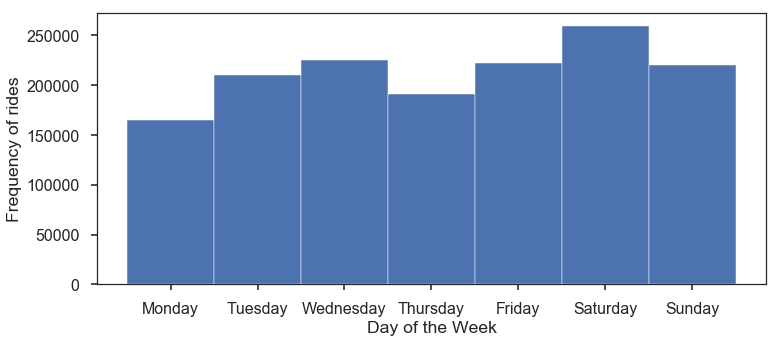

In [13]:
fig,ax=plt.subplots(1,1,figsize=(12,5))
ax.hist(nyc_cab['lpep_pickup_datetime'].dt.dayofweek,bins=np.arange(min(nyc_cab['lpep_pickup_datetime'].dt.dayofweek), max(nyc_cab['lpep_pickup_datetime'].dt.dayofweek+2), 1.0),edgecolor="white",align='left')
ax.set_xticks(np.arange(min(nyc_cab['lpep_pickup_datetime'].dt.dayofweek), max(nyc_cab['lpep_pickup_datetime'].dt.dayofweek+1), 1.0))
ax.set_xticklabels(['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
ax.set_xlabel('Day of the Week')
ax.set_ylabel('Frequency of rides')
plt.show()

I do not see any interesting thing here. The frequency of rides for every day is nearly same, Saturday being the highest and Monday being the lowest.

Text(0,0.5,'Number of Pickups')

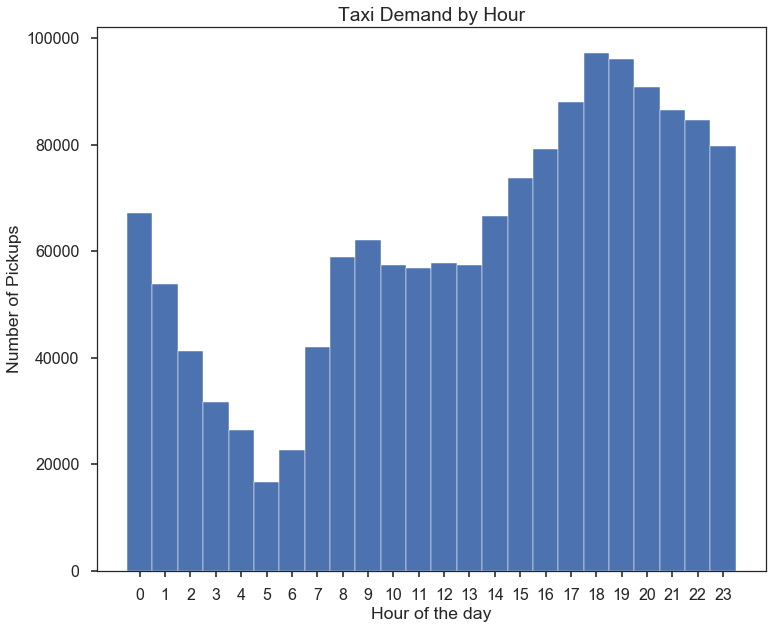

In [14]:
fig,ax=plt.subplots(1,1,figsize=(12,10))
ax.hist(x=nyc_cab['lpep_pickup_datetime'].dt.hour,bins=np.arange(0,25,1),edgecolor="white",align='left')
ax.set_xticks(np.arange(0,24,1))
ax.set_title('Taxi Demand by Hour')
ax.set_xlabel('Hour of the day')
ax.set_ylabel('Number of Pickups')

We can see that number of pickups increase as the hour of the day increases and reaches a maximum on 6 PM.

### Histogram of Fare Amount

Text(0,0.5,'Number of rides')

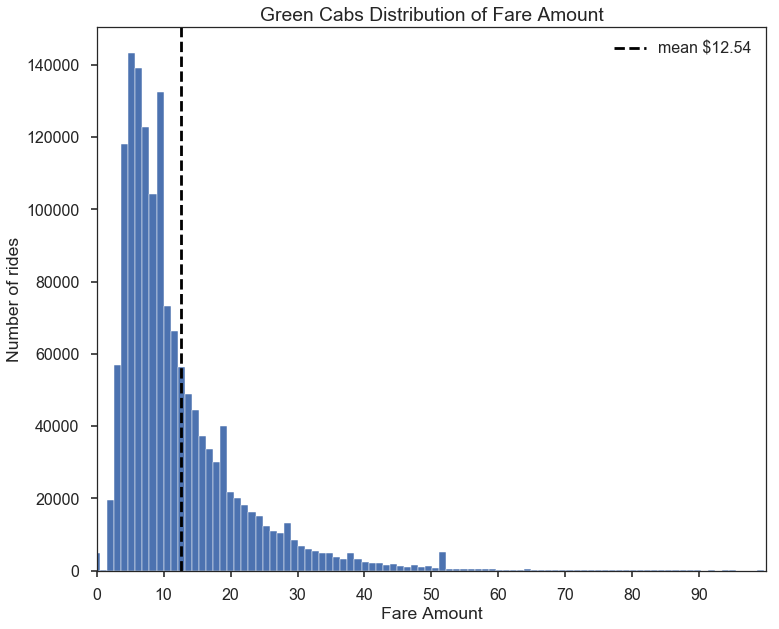

In [15]:
fig,ax=plt.subplots(1,1,figsize=(12,10))
ax.hist(x=nyc_cab['Fare_amount'],bins=1000,edgecolor="white",align='left',label='_nolegend_')
ax.set_xlim(0,100)
ax.axvline(nyc_cab['Fare_amount'].mean(), c='black',label='mean $%0.2f'%(nyc_cab['Fare_amount'].mean())
              ,ls='--')
ax.legend()
ax.set_xticks(np.arange(0,100,10))
ax.set_title('Green Cabs Distribution of Fare Amount')
ax.set_xlabel('Fare Amount')
ax.set_ylabel('Number of rides')

From this histogram it can be clearly seen that the majority of the Fare Amount is between 0-20 Dollars with a mean of $12.54.
A small spike between 50-60 is from the trips to JFK which will be verified in the following histograms.
Some Fare Amounts in the data are negative which are not shown here. These are outliers and we should remove them from our calculations.

###### This new dataset nyc_cab_jfk consists of datapoints of people who were either picked up from JFK or were dropped off to JFK.

In [16]:
nyc_cab_jfk = nyc_cab[((nyc_cab.Pickup_latitude>=40.620643) & (nyc_cab.Pickup_latitude<=40.665373) 
                    & (nyc_cab.Pickup_longitude>=-73.827793) & (nyc_cab.Pickup_longitude<=-73.746973)) | 
                    ((nyc_cab.Dropoff_latitude>=40.620643) & (nyc_cab.Dropoff_latitude<=40.665373) 
                    & (nyc_cab.Dropoff_longitude>=-73.827793) &(nyc_cab.Dropoff_longitude<=-73.746973))]

nyc_cab_jfk_pickup = nyc_cab[((nyc_cab.Pickup_latitude>=40.620643) & (nyc_cab.Pickup_latitude<=40.665373) 
                     & (nyc_cab.Pickup_longitude>=-73.827793) & (nyc_cab.Pickup_longitude<=-73.746973))]

nyc_cab_jfk_dropoff = nyc_cab[((nyc_cab.Dropoff_latitude>=40.620643) & (nyc_cab.Dropoff_latitude<=40.665373) 
                    & (nyc_cab.Dropoff_longitude>=-73.827793) & (nyc_cab.Dropoff_longitude<=-73.746973))]

##### Plotting Histogram of Fare Amount of  People Picked-up and Dropped-off at JFK

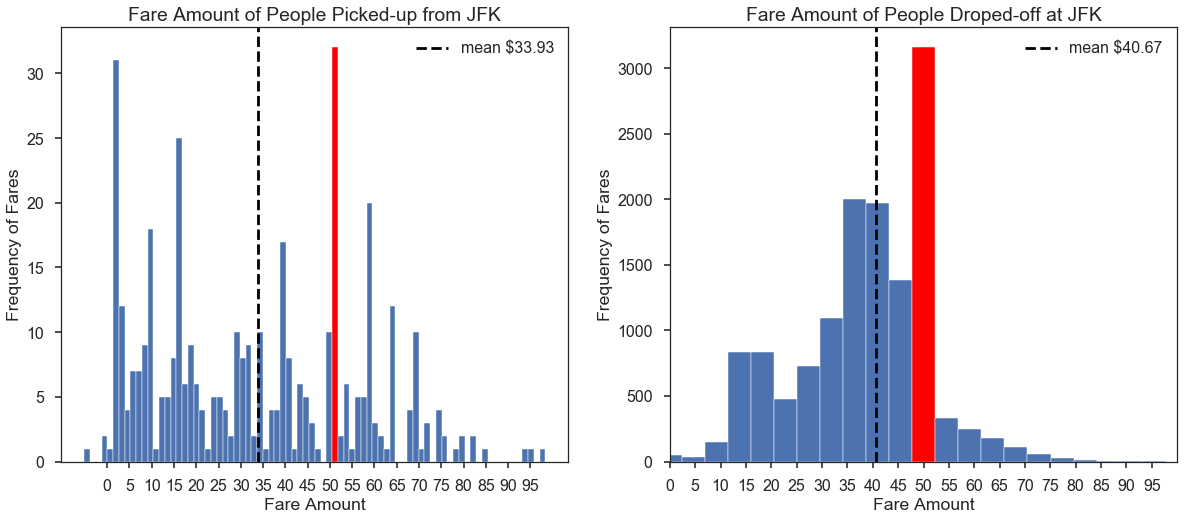

In [17]:
fig,ax=plt.subplots(1,2,figsize=(20,8))
n,bins,pathces=ax[0].hist(nyc_cab_jfk_pickup['Fare_amount'],bins=80,edgecolor="white",align='left',label='_nolegend_')
pathces[43].set_fc('r')
ax[0].axvline(nyc_cab_jfk_pickup['Fare_amount'].mean(), c='black',label='mean $%0.2f'%(nyc_cab_jfk_pickup['Fare_amount'].mean())
              ,ls='--')
ax[0].set_xticks(np.arange(0,100,5))
ax[0].set_xlabel('Fare Amount')
ax[0].set_ylabel('Frequency of Fares')
ax[0].set_title('Fare Amount of People Picked-up from JFK')
ax[0].legend()

n,bins,pathces=ax[1].hist(nyc_cab_jfk_dropoff['Fare_amount'],bins=100,edgecolor="white",align='left',label='_nolegend_')
pathces[12].set_fc('r')
ax[1].set_xlim(0,100)
ax[1].axvline(nyc_cab_jfk_dropoff['Fare_amount'].mean(), c='black',label='mean $%0.2f'%(nyc_cab_jfk_dropoff['Fare_amount'].mean())
              ,ls='--')
ax[1].set_xticks(np.arange(0,100,5))
ax[1].set_xlabel('Fare Amount')
ax[1].set_ylabel('Frequency of Fares')
ax[1].set_title('Fare Amount of People Droped-off at JFK')
ax[1].legend()

plt.show()

The above histograms show the difference between mean of Fare Amounts of poeple picked-up and droped-off at JFK airport.

In the first histogram we have some negative values of Fare Amount which is not possible. We have to remove such data points from the data set. 

The big red spike between 40-60 in both the histograms is consistent with the spike which we had seen in the previous Fare Amount histogram.

Thus, we can conclude that people travelling to or from JFK tend to pay a similar Fare Amount of approx $50.

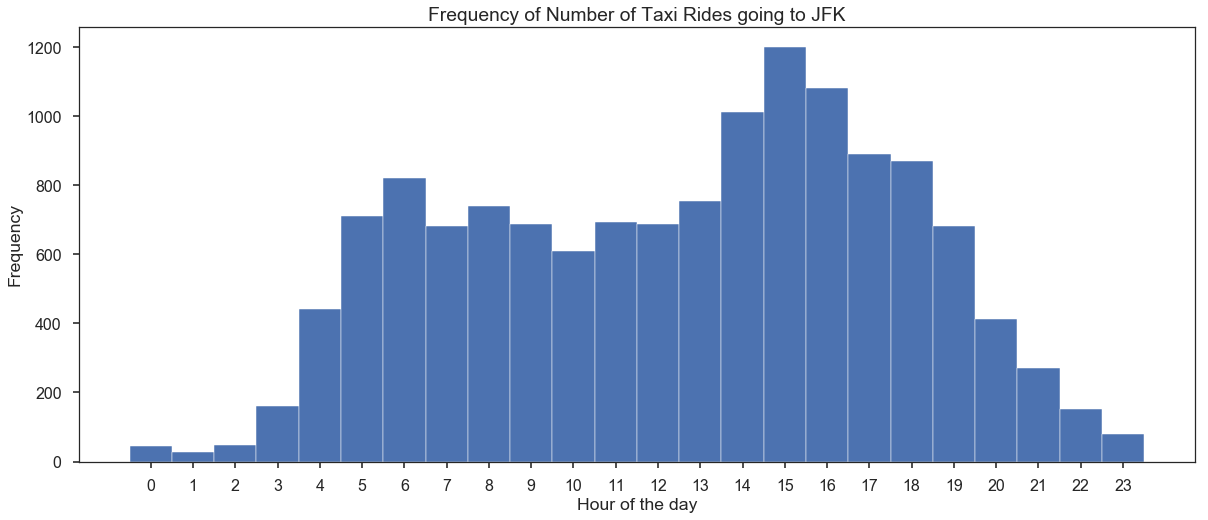

In [18]:
fig,ax=plt.subplots(1,1,figsize=(20,8))

ax.hist(nyc_cab_jfk_dropoff['lpep_pickup_datetime'].dt.hour,bins=np.arange(0,25,1),edgecolor="white",align='left')
ax.set_xticks(np.arange(0,24,1))
ax.set_xlabel('Hour of the day')
ax.set_ylabel('Frequency')
ax.set_title('Frequency of Number of Taxi Rides going to JFK')
plt.show()

This graph clearly shows that the demand for going to JFK airport is highest during the afternoon hours (2,3 and 4 PM).

## Intra- vs. Inter- Borough  Traffic

#### Cleaning the datafram of any outliers or anamolies

There are some latitude and longitude cordinates in the dataset which are way outside New York and are an anamoly. We have to remove such data points For doing this, let us assume that the points having latitude and longitude values 100 miles from NY are outliers and let us remove them from our dataset.

In [19]:
nyc_lat_centre=40.719681
nyc_long_centre=-74.00536

nyc_lat_max=41.00
nyc_lat_min=40.50

nyc_long_max=-73.7
nyc_long_min=-74.3

new_nyc_cab=nyc_cab[(nyc_cab['Pickup_latitude']<nyc_lat_max) & (nyc_cab['Pickup_latitude']>nyc_lat_min) &
                    (nyc_cab['Dropoff_latitude']<nyc_lat_max) & (nyc_cab['Dropoff_latitude']>nyc_lat_min) &
                    (nyc_cab['Pickup_longitude']<nyc_long_max) & (nyc_cab['Pickup_longitude']>nyc_long_min) &
                    (nyc_cab['Dropoff_longitude']<nyc_long_max) & (nyc_cab['Dropoff_longitude']>nyc_long_min)]

In [20]:
gdf=gpd.GeoDataFrame.from_file('geo_export_0ac7da41-b926-44a8-b31a-617fa9b21ed0.shp')
gdf

,shape_leng,shape_area,boro_name,boro_code,geometry
0,330434.340939,1.623914e+09,Staten Island,5.0,(POLYGON ((-74.05050806403247 40.5664220341608...
1,361657.416718,6.366004e+08,Manhattan,1.0,(POLYGON ((-74.01092841268031 40.6844914725429...
2,741150.814455,1.937596e+09,Brooklyn,3.0,(POLYGON ((-73.86706149472118 40.5820879767934...
3,895729.259626,3.044780e+09,Queens,4.0,(POLYGON ((-73.83668274106707 40.5949466970158...
4,463454.790585,1.186619e+09,Bronx,2.0,(POLYGON ((-73.89680883223774 40.7958084451597...


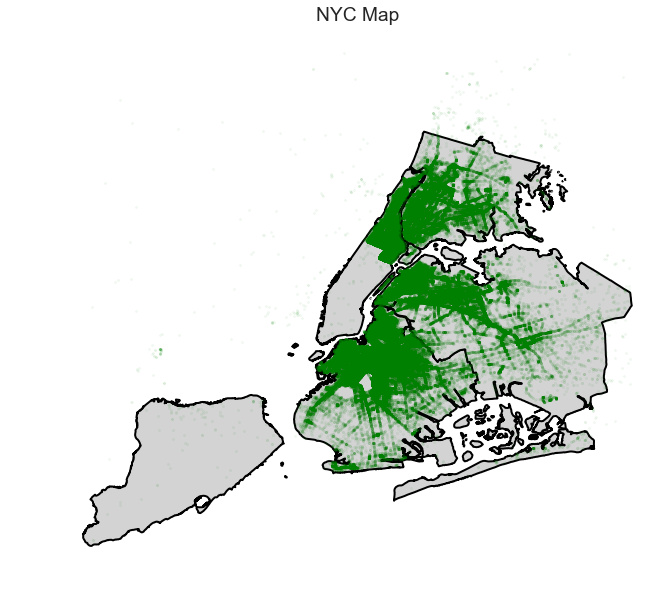

In [21]:
nyc=gdf.plot(figsize=(20,10),edgecolor='black',color='lightgray',linewidth=2)
nyc.axis('off')
nyc.set_title('NYC Map')
plt.scatter(y=new_nyc_cab['Pickup_latitude'],x=new_nyc_cab['Pickup_longitude'],s=5,alpha=0.05,color='green')
plt.show()

As can be clearly seen from the scatter plot, most of the green taxi pickup points in new york are in-

1.Upper East and West Manhattan.

2.Brooklyn

3.East of Queens

4.Bronx

In these areas of NY City New Yorkers have mostly used green cabs. In Staten Isalnd, green cabs are very rarely sighted because in 2015 many livery drivers in Staten Island had opposed this idea of Green Cabs. The metered fares of the green cabs were higher than the flat rates of livery drivers on congested roads and highways of Staten Island. Thus, green cabs are rarely sighted in Staten Island.

C:\Users\musta\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: MatplotlibDeprecationWarning: The set_axis_bgcolor function was deprecated in version 2.0. Use set_facecolor instead.
  


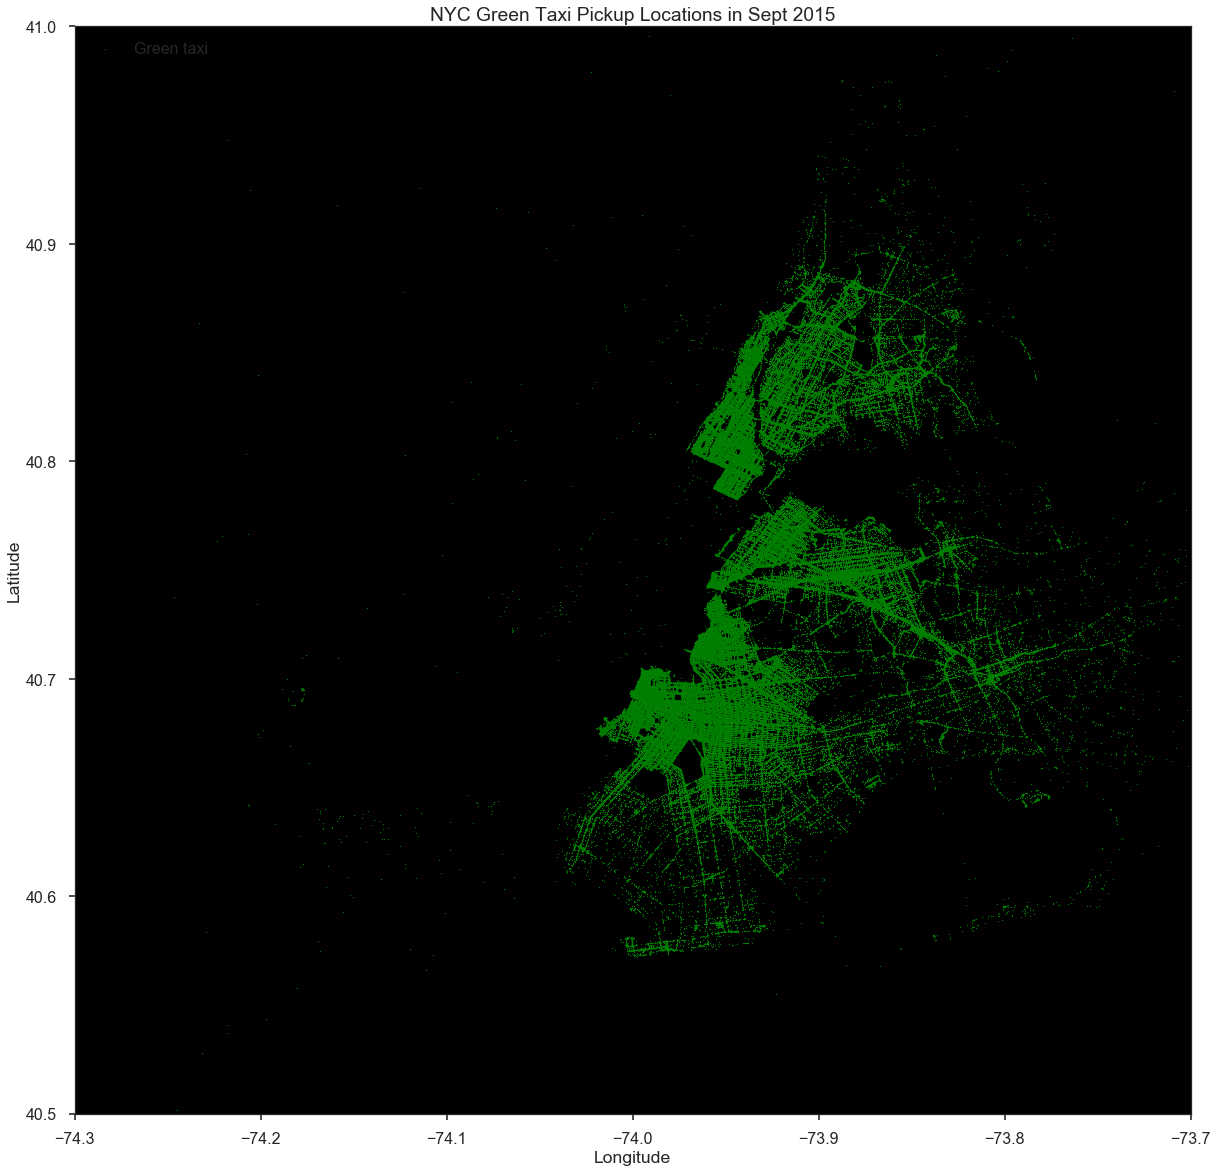

In [22]:
fig=plt.figure(figsize=(20,20))
plt.scatter(nyc_cab['Pickup_longitude'],nyc_cab['Pickup_latitude'],color='green',s=0.5,label='Green taxi')
plt.title('NYC Green Taxi Pickup Locations in Sept 2015')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.xlim(nyc_long_min,nyc_long_max)
plt.ylim(nyc_lat_min,nyc_lat_max)
plt.gca().set_axis_bgcolor('black')
plt.legend()
plt.show()

Simplying the geometry of the New York's 5 boroughs.

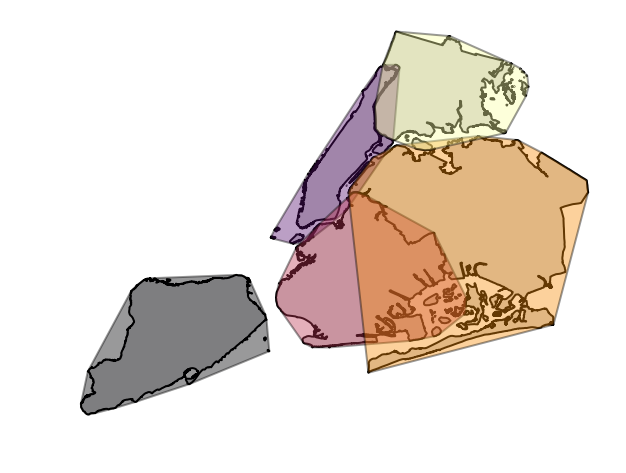

In [23]:
hulls=gdf['geometry'].convex_hull
hulls.plot(ax=gdf.plot(figsize=(10,10),edgecolor='black',color='lightgray',linewidth=2),alpha=0.4,linewidth=2,cmap='inferno',
           edgecolor='black')
plt.axis('off')
plt.show()

The convex hulls are made around every borough to simplify its geometry. With the help of these convex hulls we can see which user points fell in which NYC borough without being computationally expensive. We can further simplify these convex hulls by creating envelopes.

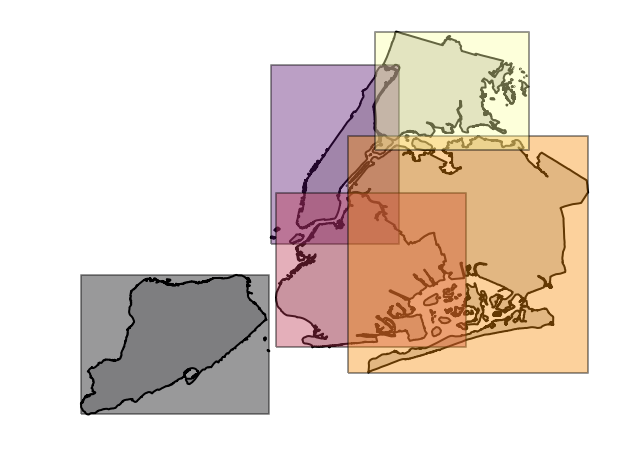

In [24]:
envelope=gpd.GeoSeries(hulls.envelope)
envelope.plot(ax=gdf.plot(figsize=(10,10),edgecolor='black',color='lightgray',linewidth=2),alpha=0.4,linewidth=2,cmap='inferno',
           edgecolor='black')
plt.axis('off')
plt.show()

##### Creating  a Widget to Visualize Users Moving Over Time

In [25]:
def plot(hour=1):
    t=new_nyc_cab[nyc_cab['lpep_pickup_datetime'].dt.hour==hour]
    
    hulls.plot(ax=gdf.plot(figsize=(10,10),edgecolor='black',color='lightgray',linewidth=2),alpha=0.4,linewidth=2,cmap='inferno',
           edgecolor='black')
    plt.scatter(x=t['Pickup_longitude'],y=t['Pickup_latitude'],s=5,alpha=0.2,color='green')

interact(plot,hour=(1,23,1))    

A Jupyter Widget

<function __main__.plot>

With this interactive plot we can clearly see intra.-vs. inter-borough traffic in September 2015. It can be seen that as the hour progresses from 0th (12 AM) to 5 AM the density of pickup points begins to decrease. Then after 5 AM it again starts increasing gradually until it reaches its maximum in the 18th hour of the day i.e 6 PM.

### Calculating and Analyzing Average Speed of Green Cabs

##### Calculating Duration of Each Ride

Duration of each ride will be the difference between the pickup and dropoff time.

Text(0,0.5,'Number of rides')

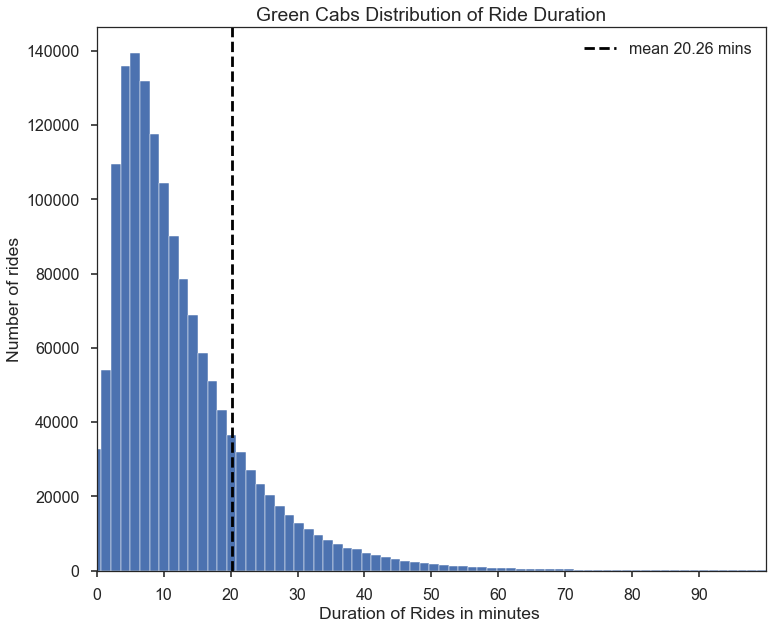

In [26]:
duration=(nyc_cab['Lpep_dropoff_datetime']-nyc_cab['lpep_pickup_datetime']).dt.total_seconds()/60

fig,ax=plt.subplots(1,1,figsize=(12,10))

ax.hist(x=duration,bins=1000,edgecolor="white",align='left',label='_nolegend_')
ax.set_xlim(0,100)
ax.axvline(duration.mean(), c='black',label='mean %0.2f mins'%(duration.mean())
              ,ls='--')
ax.legend()
ax.set_xticks(np.arange(0,100,10))
ax.set_title('Green Cabs Distribution of Ride Duration')
ax.set_xlabel('Duration of Rides in minutes ')
ax.set_ylabel('Number of rides')

It can be clearly seen that the distribution of Trip Duration and Fare Amount are very similar. This is a right skewed curve which is not abnormal.

##### Calculating speed of each ride

Removing datapoints having a duration = 0

In [27]:
duration1=duration[duration !=0]

In [28]:
speed=round(nyc_cab['Trip_distance']/(duration1/60),2)
speed.dropna(inplace=True)

Text(0,0.5,'Number of rides')

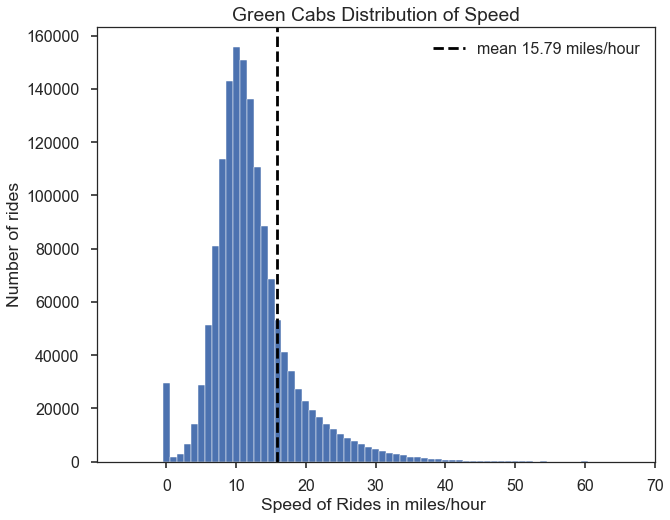

In [29]:
fig,ax=plt.subplots(1,1,figsize=(10,8))

ax.hist(x=speed,bins=np.arange(0,100,1),edgecolor="white",align='left',label='_nolegend_')
ax.set_xlim(-10,70)
ax.axvline(speed.mean(), c='black',label='mean %0.2f miles/hour'%(speed.mean())
              ,ls='--')
ax.legend()
ax.set_xticks(np.arange(0,80,10))
ax.set_title('Green Cabs Distribution of Speed')
ax.set_xlabel('Speed of Rides in miles/hour ')
ax.set_ylabel('Number of rides')

We obtain a nearly normal curve of speed of green taxis' with a mean of 15.6 miles/hour. Speed of many data points can be seen as zero because many in points in the data have trip distance as zero. The peak of this curve is about 12-14 miles/hour.

### Analysis of Tips Received by a Green Taxi Driver

Let us add a derived column in the dataframe which will be the tips received by the driver as a percentage of total Fare Amount.

In [30]:
#Copying the original DataFrame
nyc_cab1=nyc_cab.copy()

#Removing Fare Amounts which are negative and zero
nyc_cab1=nyc_cab1[nyc_cab1['Total_amount']>0]

In [31]:
nyc_cab1['Tip_Percentage']=(nyc_cab1['Tip_amount']/nyc_cab1['Total_amount'])*100


Now let us plot a histogram of Tip Percentages to analyze this.

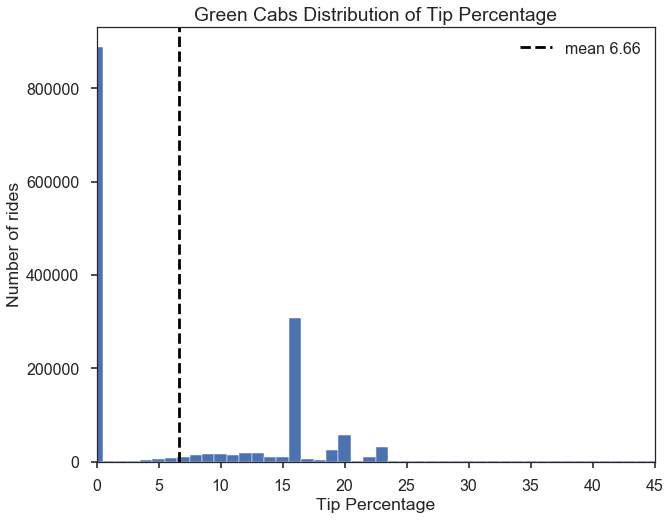

In [32]:
fig,ax=plt.subplots(1,1,figsize=(10,8))

ax.hist(x=nyc_cab1['Tip_Percentage'],bins=100,edgecolor="white",align='left',label='_nolegend_')
ax.set_xlim(0,40)
ax.axvline(nyc_cab1['Tip_Percentage'].mean(), c='black',label='mean %0.2f'%(nyc_cab1['Tip_Percentage'].mean())
              ,ls='--')
ax.legend()
ax.set_xticks(np.arange(0,50,5))
ax.set_title('Green Cabs Distribution of Tip Percentage')
ax.set_xlabel('Tip Percentage')
ax.set_ylabel('Number of rides')
plt.show()

As it can be clearly seen that majority of the customers have not tipped the drivers. The mean tip percentage of the fare amount is 6.66. Also, apart from zero, 16% is the most common tip percentage value among New Yorkers.

Lets Plot a Heatmap of the percentage to get a better sense of distribution of tip percentage in each borough of New York.

To plot this on a Latitutde and Longitude we will first have to remove those values from the data whoes latitude and longitude values are very far off from New York.

In [33]:
new_nyc_cab1=nyc_cab1[(nyc_cab1['Pickup_latitude']<nyc_lat_max) & (nyc_cab1['Pickup_latitude']>nyc_lat_min) &
                    (nyc_cab1['Dropoff_latitude']<nyc_lat_max) & (nyc_cab1['Dropoff_latitude']>nyc_lat_min) &
                    (nyc_cab1['Pickup_longitude']<nyc_long_max) & (nyc_cab1['Pickup_longitude']>nyc_long_min) &
                    (nyc_cab1['Dropoff_longitude']<nyc_long_max) & (nyc_cab1['Dropoff_longitude']>nyc_long_min)]

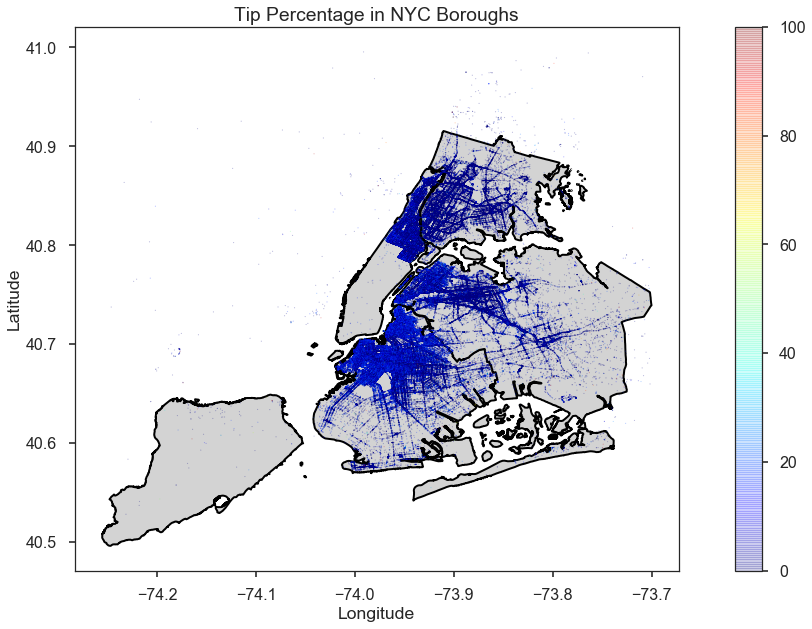

In [34]:
nyc=gdf.plot(figsize=(20,10),edgecolor='black',color='lightgray',linewidth=2)

plt.scatter(x=new_nyc_cab1['Pickup_longitude'],y=new_nyc_cab1['Pickup_latitude'],alpha=0.2,c=new_nyc_cab1['Tip_Percentage'],
            cmap=plt.get_cmap('jet'),s=0.5)
plt.title('Tip Percentage in NYC Boroughs')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.colorbar()
plt.show()

It can be seen that tip percentages are very high in upper Manhattan and upper Queens. So Taxi drivers have a higher probability of getting tips in these areas.

Now, let us identify relationship of other variables with Tip percentage to get a clear idea of how tip works in case of Green taxi.

In [35]:
tip1=new_nyc_cab1.filter(['lpep_pickup_datetime','Tip_Percentage'])
tip1['lpep_pickup_datetime']=pd.to_datetime(tip1['lpep_pickup_datetime'])

In [36]:
tip1['day']=tip1['lpep_pickup_datetime'].dt.dayofweek
tip1['hour']=tip1['lpep_pickup_datetime'].dt.hour
tip1.drop('lpep_pickup_datetime',axis=1,inplace=True)

In [37]:
data=tip1['Tip_Percentage'].groupby([tip1['hour'],tip1['day']]).mean()
data=np.array(data)
data=np.reshape(data,(-1,7))

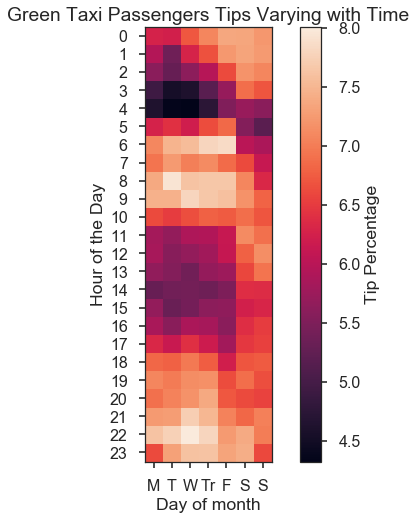

In [38]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(1,1,1)
im = ax.imshow(data, interpolation='nearest')
ax.set_yticks(range(24))
hours = np.array(range(0, 24))
ax.set_yticklabels(hours)
ax.set_ylabel('Hour of the Day')
ax.set_xticks(range(7))
ax.set_xticklabels(['M','T','W','Tr','F','S','S'])
ax.set_xlabel('Day of month')
ax.set_title('Green Taxi Passengers Tips Varying with Time')

# Add a colour bar along the bottom and label it
cbar = fig.colorbar(ax=ax, mappable=im, orientation='vertical',drawedges=False)
cbar.set_label('Tip Percentage')

plt.show()

This heatmap shows that the tipping behaviour of the New Yorkers is not random and displays strong ups and downs depending upon the day and hour of the week. The passengers do not give same tip percentages from morning to midnight on a particular day.
Instead, what is we observe is that the green cab passengers tip more generously in morning rush hours and evening rush hours. This pattern is particularly significant from Monday to Friday. However, passenger tend to give generous tips on every hours of the weekend (Saturday and Sunday). In the above heatmap I have cleaned the data ( removed Total Amount which were negative and removed observations whose pickup and dropoff was beyond the lat-long boundaries of NYC) and then reported the results.

In [39]:
#Taking only data points which are in the Lat-long boundaries of NYC.
df=nyc_cab[(nyc_cab['Pickup_latitude']<nyc_lat_max) & (nyc_cab['Pickup_latitude']>nyc_lat_min) &
                    (nyc_cab['Dropoff_latitude']<nyc_lat_max) & (nyc_cab['Dropoff_latitude']>nyc_lat_min) &
                    (nyc_cab['Pickup_longitude']<nyc_long_max) & (nyc_cab['Pickup_longitude']>nyc_long_min) &
                    (nyc_cab['Dropoff_longitude']<nyc_long_max) & (nyc_cab['Dropoff_longitude']>nyc_long_min)]

#Removing Observations whose Fare Amounts are negative or zero.
df=df[df['Total_amount']>0]

#Calculating Tip Percentage
df['Tip_Percentage']= (df['Tip_amount']/df['Total_amount'])*100


df['lpep_pickup_datetime']=pd.to_datetime(df['lpep_pickup_datetime'])
df['Lpep_dropoff_datetime']=pd.to_datetime(df['Lpep_dropoff_datetime'])

df['duration']=(df['Lpep_dropoff_datetime']-df['lpep_pickup_datetime']).dt.total_seconds()/60

#Removing data points whose duration is equal to zero.
df=df[df['duration']!=0]

#Calculating speed of each ride and storing it as a column
df['speed']=round(df['Trip_distance']/(df['duration']/60),2)

#Removing Superman cabs i.e cabs having a speed of more than 50 miles/hour
df=df[df['speed']<50]